In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Extract Saturation Level

In [31]:
import cv2
import numpy as np

# Load the actual (reference) and edited images
actual_image = cv2.imread('../images/nature/lake_actual.jpg')  # Replace with the path to your actual image
edited_image = cv2.imread('../images/nature/lake_edited.jpg')  # Replace with the path to your edited image

# Resize the edited image to match the actual image dimensions if they are different
if actual_image.shape[:2] != edited_image.shape[:2]:  # Compare only height and width
    edited_image = cv2.resize(edited_image, (actual_image.shape[1], actual_image.shape[0]))  # Resize to match

# Convert both images to HSV color space
hsv_actual = cv2.cvtColor(actual_image, cv2.COLOR_BGR2HSV)
hsv_edited = cv2.cvtColor(edited_image, cv2.COLOR_BGR2HSV)

# Extract the Saturation channel from both images
saturation_actual = hsv_actual[:, :, 1]
saturation_edited = hsv_edited[:, :, 1]

# Calculate the difference in Saturation values
saturation_difference = cv2.absdiff(saturation_actual, saturation_edited)

# Calculate statistics
mean_diff = np.mean(saturation_difference)

print(f"Mean Difference in Saturation Level: {mean_diff}")

Mean Difference in Saturation Level: 43.44611568358482


## Apply Saturation into Another Image

(np.float64(-0.5), np.float64(1079.5), np.float64(809.5), np.float64(-0.5))

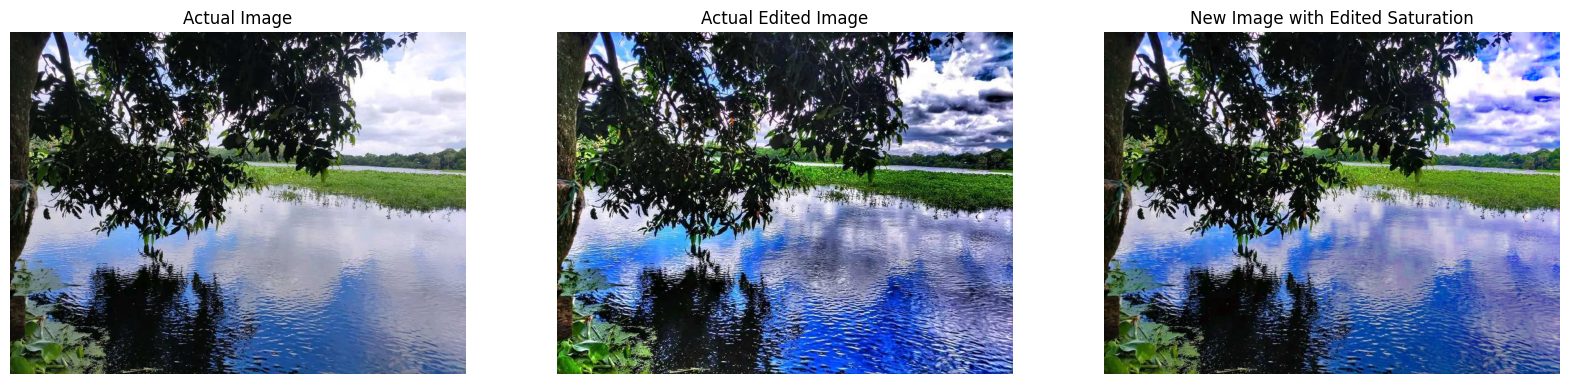

In [ ]:
# Load the new image
new_image = cv2.imread('../images/nature/lake_actual.jpg')  # Replace with the path to your new image
actual_edited = cv2.imread('../images/nature/lake_edited.jpg')  # Replace with the path to your edited image

# Resize the new image to match the dimensions of the edited image if they are different
if new_image.shape[:2] != edited_image.shape[:2]:  # Compare only height and width
    new_image = cv2.resize(new_image, (edited_image.shape[1], edited_image.shape[0]))  # Resize to match

# Convert the new image to HSV color space
hsv_new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2HSV)

# Replace the saturation channel of the new image with the saturation channel from the edited image
hsv_new_image[:, :, 1] = saturation_edited

# Convert the new image back to BGR color space
new_image_with_edited_saturation = cv2.cvtColor(hsv_new_image, cv2.COLOR_HSV2BGR)

# Save or display the new image
cv2.imwrite('../images/nature/new_image_with_edited_saturation.jpg', new_image_with_edited_saturation)  # Replace with the desired path to save the new image

# actual image display
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plt.title('Actual Image')
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.axis('off')

# edited image display
plt.subplot(1, 3, 2)
plt.title('Actual Edited Image')
plt.imshow(cv2.cvtColor(actual_edited, cv2.COLOR_BGR2RGB))
plt.axis('off')

# Display the new image
plt.subplot(1, 3, 3)
plt.title('New Image with Edited Saturation')
plt.imshow(cv2.cvtColor(new_image_with_edited_saturation, cv2.COLOR_BGR2RGB))
plt.axis('off')